# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
df = pd.read_csv("train.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.shape

(913000, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [6]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
# Create dataset for store number 1 and visualize store, item and sales trend
ts = df[df.store==1].sort_index(ascending=True)
ts

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
896561,2017-12-27,1,50,38
896562,2017-12-28,1,50,52
896563,2017-12-29,1,50,59
896564,2017-12-30,1,50,66


In [8]:
# Drop store and item column
ts = ts.drop(['store','item'], axis = 1)
ts

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
896561,2017-12-27,38
896562,2017-12-28,52
896563,2017-12-29,59
896564,2017-12-30,66


In [9]:
ts['date'] =  pd.to_datetime(ts['date'])

In [10]:
# Sum sales according to same daily date
ts = ts.groupby('date').sum()
ts

,sales
date,
2013-01-01,1316
2013-01-02,1264
2013-01-03,1305
2013-01-04,1452
2013-01-05,1499
...,...
2017-12-27,1837
2017-12-28,1951
2017-12-29,2116


In [11]:
## Resample into monthly date and sum daily sales each month
ts = ts['sales'].resample('MS').sum()
ts.head()

date
2013-01-01    41077
2013-02-01    41306
2013-03-01    55827
2013-04-01    61523
2013-05-01    69272
Freq: MS, Name: sales, dtype: int64

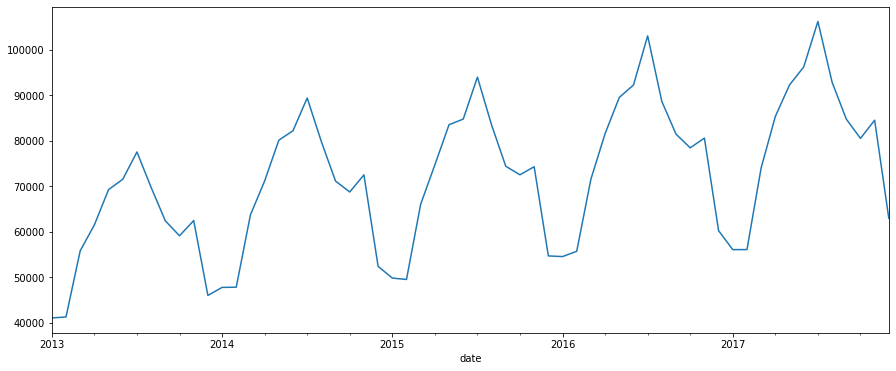

In [12]:
ts.plot(figsize=(15, 6))
plt.show()

# Check Stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [14]:
check_stationarity(ts)

The test statistic: -4.995500
p-value: 0.000023
Critical Values:
1%: -3.575
5%: -2.924
10%: -2.600


# ACF and PACF plot

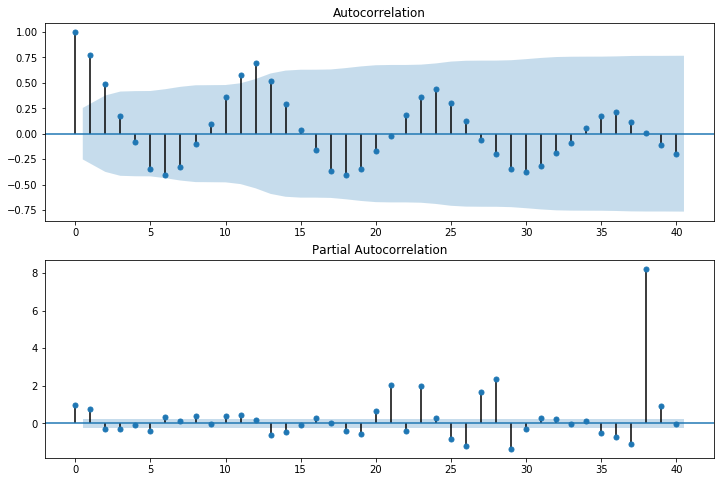

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts,lags=40,ax=ax2)

# Determine P, D and Q value using hyperparameter

In [16]:
len(ts)

60

In [17]:
import itertools

p=range(0,10)
q=range(0,10)
d=range(0,2)

In [18]:
pdq = list(itertools.product(p, d, q))

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [20]:
params=[]
AICs=[]
print()

In [21]:
for param in pdq:
        try:
                mod = ARIMA(ts, order=param)
                results = mod.fit()
                
                print()
                print("Parameter values for p, d and q {}".format(param))
                print('ARIMA{} - AIC:{}'.format(param, results.aic))
                print()
            
                params.append(param)
                AICs.append(results.aic)
        except:
                continue

# Get the index of minimum AIC from the list
index_min_aic = np.argmin(AICs)

# Best parameter sets (p, d, q) for ARIMA
print(params[index_min_aic])
print(AICs[index_min_aic])       


Parameter values for p, d and q (0, 0, 0)
ARIMA(0, 0, 0) - AIC:1519.0293960600548


Parameter values for p, d and q (0, 0, 1)
ARIMA(0, 0, 1) - AIC:1298.5557745108688


Parameter values for p, d and q (0, 0, 2)
ARIMA(0, 0, 2) - AIC:1274.7274565846994


Parameter values for p, d and q (0, 0, 3)
ARIMA(0, 0, 3) - AIC:1275.280248485377


Parameter values for p, d and q (0, 0, 4)
ARIMA(0, 0, 4) - AIC:1279.7373729332019


Parameter values for p, d and q (0, 0, 5)
ARIMA(0, 0, 5) - AIC:1288.9869918780882


Parameter values for p, d and q (0, 0, 6)
ARIMA(0, 0, 6) - AIC:1291.141350046492


Parameter values for p, d and q (0, 0, 7)
ARIMA(0, 0, 7) - AIC:1302.9457025138547


Parameter values for p, d and q (0, 0, 8)
ARIMA(0, 0, 8) - AIC:1301.6892914627392


Parameter values for p, d and q (0, 0, 9)
ARIMA(0, 0, 9) - AIC:1307.523440998454


Parameter values for p, d and q (0, 1, 0)
ARIMA(0, 1, 0) - AIC:1251.984559417828


Parameter values for p, d and q (0, 1, 1)
ARIMA(0, 1, 1) - AIC:1252.55555655733


Parameter values for p, d and q (4, 1, 9)
ARIMA(4, 1, 9) - AIC:1246.8380191385872


Parameter values for p, d and q (5, 0, 0)
ARIMA(5, 0, 0) - AIC:1252.5456360576425


Parameter values for p, d and q (5, 0, 1)
ARIMA(5, 0, 1) - AIC:1232.6364818507388


Parameter values for p, d and q (5, 0, 2)
ARIMA(5, 0, 2) - AIC:1235.935233146136


Parameter values for p, d and q (5, 0, 3)
ARIMA(5, 0, 3) - AIC:1225.6522590177487


Parameter values for p, d and q (5, 0, 4)
ARIMA(5, 0, 4) - AIC:1225.4596322311068


Parameter values for p, d and q (5, 0, 5)
ARIMA(5, 0, 5) - AIC:1226.7958128539606


Parameter values for p, d and q (5, 0, 6)
ARIMA(5, 0, 6) - AIC:1246.707678608784


Parameter values for p, d and q (5, 0, 7)
ARIMA(5, 0, 7) - AIC:1234.0213690169128


Parameter values for p, d and q (5, 0, 8)
ARIMA(5, 0, 8) - AIC:1236.600406819457


Parameter values for p, d and q (5, 0, 9)
ARIMA(5, 0, 9) - AIC:1236.879662692151


Parameter values for p, d and q (5, 1, 0)
ARIMA(5, 1, 0) - AIC:1236.50825316432


Parameter values for p, d and q (9, 1, 7)
ARIMA(9, 1, 7) - AIC:1236.575905313049


Parameter values for p, d and q (9, 1, 8)
ARIMA(9, 1, 8) - AIC:1229.454840413206


Parameter values for p, d and q (9, 1, 9)
ARIMA(9, 1, 9) - AIC:1221.8760178456253

(5, 1, 4)
1209.5483431375412


# Fit an ARIMA model

In [22]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(ts, order=(5, 1, 4))
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   60
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -594.774
Date:                Fri, 18 Jun 2021   AIC                           1209.548
Time:                        17:47:50   BIC                           1230.324
Sample:                    01-01-2013   HQIC                          1217.658
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3005      0.184      1.634      0.102      -0.060       0.661
ar.L2          0.7146      0.186      3.833      0.000       0.349       1.080
ar.L3         -0.3898      0.187     -2.089      0.0

# Residuals Diagnosis

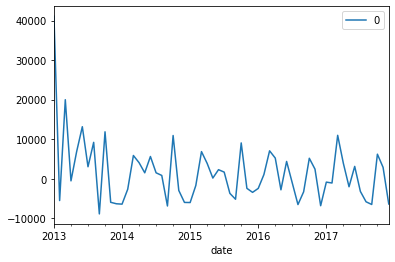

In [23]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

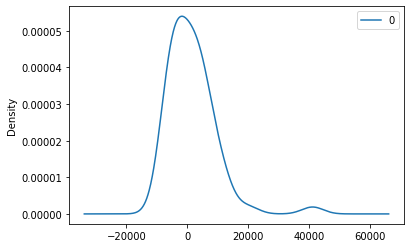

In [24]:
residuals.plot(kind='kde')

In [25]:
residuals.describe()

,0
count,60.000000
mean,1484.906644
std,7984.668452
min,-8876.252436
25%,-3490.959922
50%,516.473961
75%,5200.895962
max,41077.000000


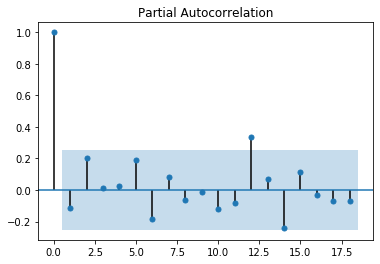

In [26]:
plot_pacf(residuals)
print()

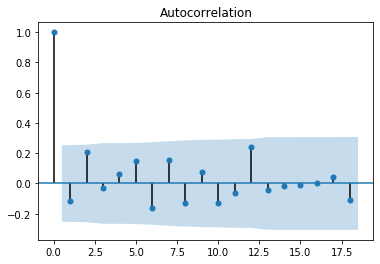

In [27]:
plot_acf(residuals)
print()

# ARIMA Predict

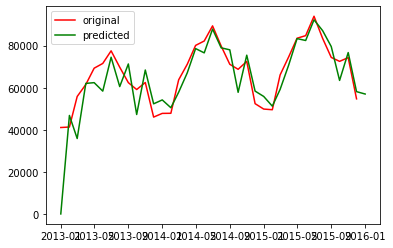

In [28]:
from math import sqrt
from sklearn.metrics import mean_squared_error

plt.plot(ts[:36],label = 'original', color='r' )
plt.plot(results.predict(0,36),label = 'predicted', color='g' )

plt.legend()

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

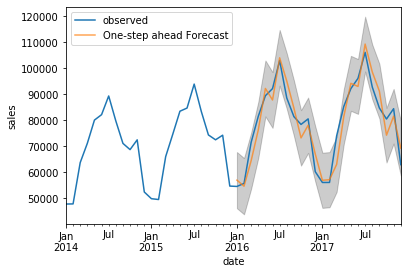

In [30]:
ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('date')
ax.set_ylabel('sales')
plt.legend()

plt.show()

In [31]:
ts_forecasted = pred.predicted_mean
ts_truth = ts['2016-01-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('MSE: {}'.format(round(mse, 2)))

# Compute the root mean square error
rmse = sqrt(mse)
print('RMSE: {}'.format(round(rmse, 2)))

MSE: 23764066.97
RMSE: 4874.84


# ARIMA Forecast

In [32]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

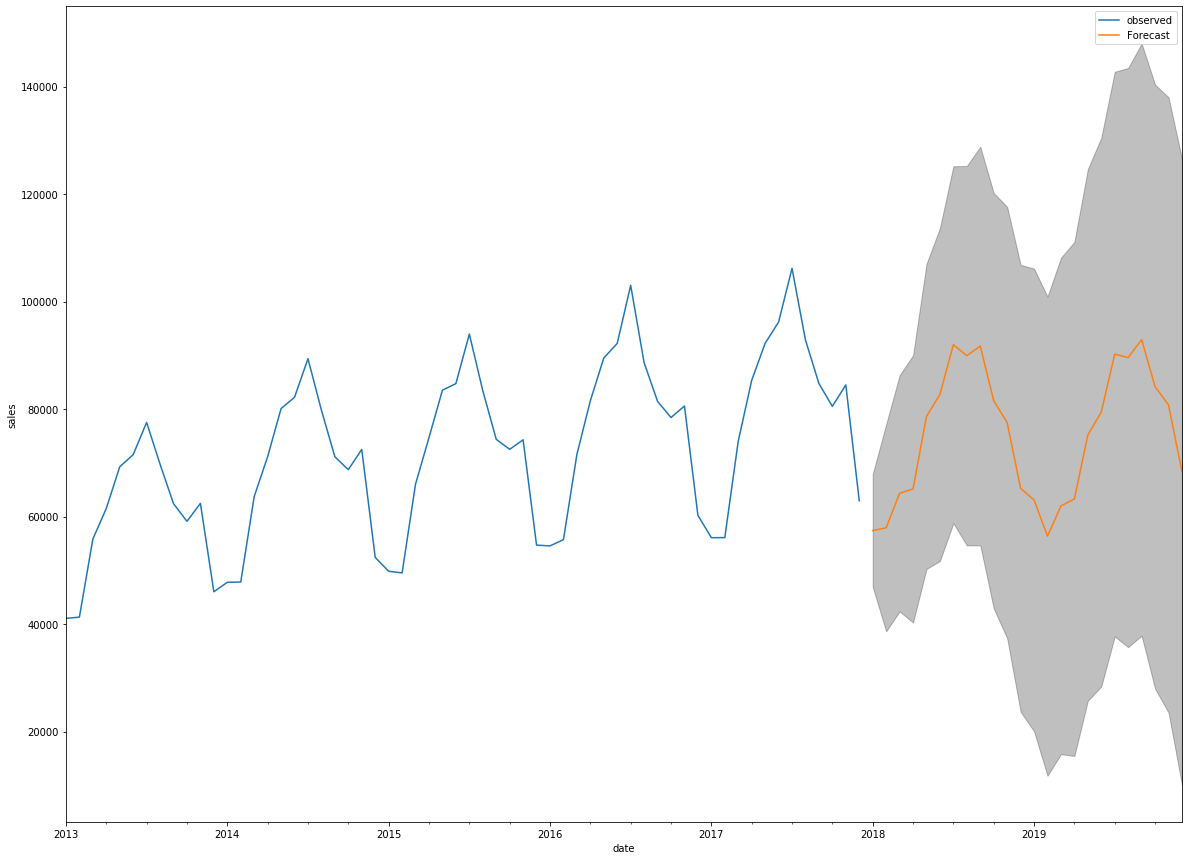

In [33]:
ax = ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('date')
ax.set_ylabel('sales')

plt.legend()
plt.show()

In [34]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(ts, results.predict())
print(rmse) 

# Calculate mean squared error
mse = mean_squared_error(ts, results.predict())
print(mse)

8055.885790161335
64897295.86412331


# Finding Sarimax values

In [35]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1492.4544523873844
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1159.6008661680007
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:953.3210875516604
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1388.5387194086056
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:912.482975545274
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:843.8458373155291
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:684.9748410270597
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1429.87524682964
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1429.5987566245667
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1173.3318457781402
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:902.201689634226
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1539.6008336495809
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1233.4955602622367
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1172.7813243109954
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:655.8762241605317
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2224.7417826228116
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1231.8147561867181
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:957.6400031856222
ARI

# Fit SARIMAX model

In [37]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -296.527
Date:                            Fri, 18 Jun 2021   AIC                            599.054
Time:                                    17:48:50   BIC                            603.633
Sample:                                01-01-2013   HQIC                           600.615
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3022      0.170     -1.775      0.076      -0.636       0.032
ar.S.L12      -0.2148      0.148   

# SARIMAX Predict

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

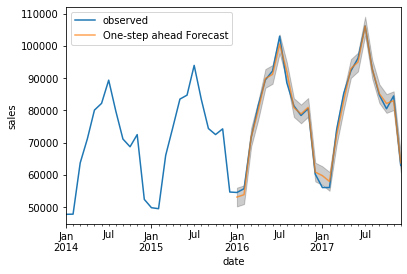

In [39]:
ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('date')
ax.set_ylabel('sales')
plt.legend()

plt.show()

In [40]:
ts_forecasted = pred.predicted_mean
ts_truth = ts['2016-01-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('MSE: {}'.format(round(mse, 2)))

# Compute the root mean square error
rmse = sqrt(mse)
print('RMSE: {}'.format(round(rmse, 2)))


MSE: 2505107.54
RMSE: 1582.75


# SARIMAX Forecast

In [41]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

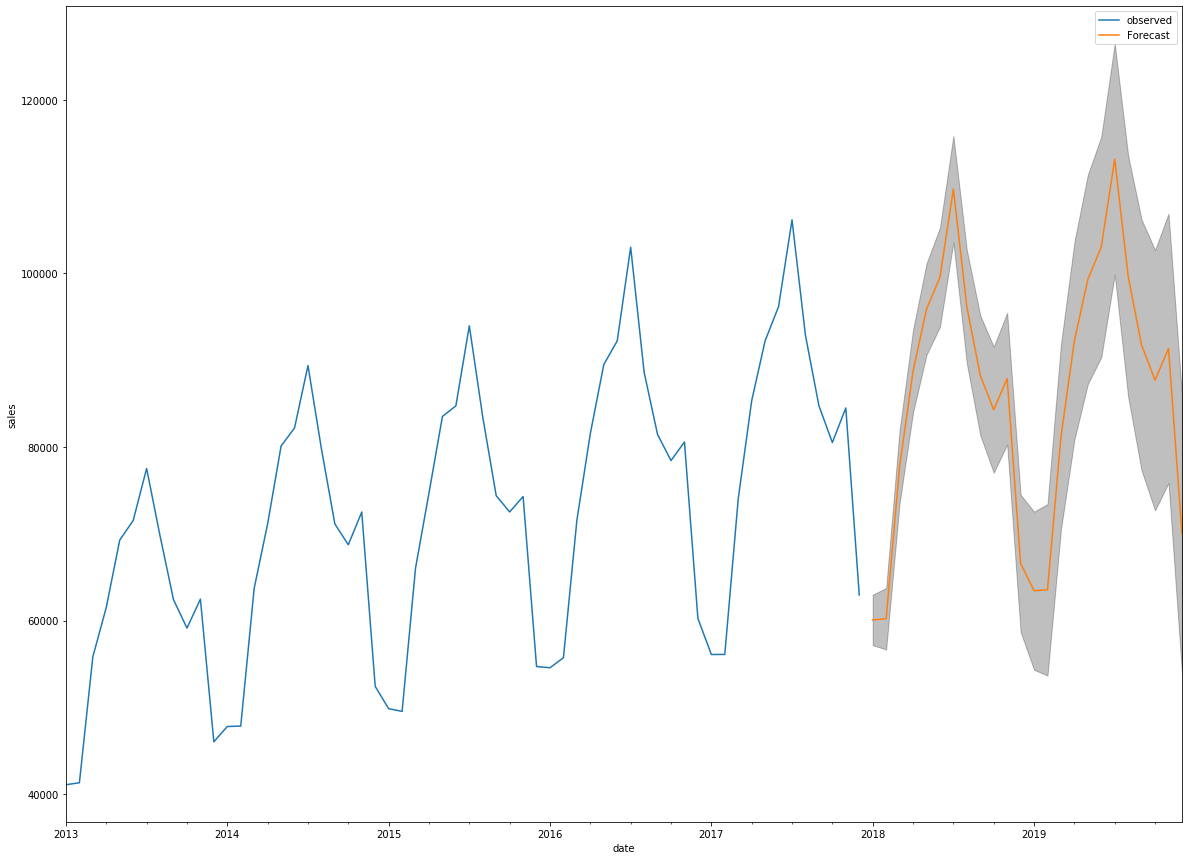

In [42]:
ax = ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('date')
ax.set_ylabel('sales')

plt.legend()
plt.show()

In [43]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate mean squared error
mse = mean_squared_error(ts, results.predict())
print('MSE: ',mse)
  
# Calculate root mean squared error
rmse=rmse(ts, results.predict())
print('RMSE: ',rmse) 


MSE:  59288097.103258066
RMSE:  7699.876434285037
